# Fully Connected Neural Networks

## Biological Neurons

<p align="center">
<img src="https://drive.google.com/uc?id=1vj7uMjcATFVTuZvuwzUSap3Im0EEPqjY" width="400">
</p>

As you can see from the diagram, each neuron has three main components
* the (cell) body,
* an axon,
* and many dendrites.

The synapses connect the axon of one neuron to the dendrites of other neurons and determine the weight of the information that is received from other neurons.

Only when the sum of the weighted inputs to the neuron exceeds a certain threshold does the neuron fire (activate); otherwise, it is at rest.

This communication between neurons is done through electrochemical reactions, involving potassium, sodium, and chlorine.

## The MP neuron

The MP neuron was created in 1943 by Warren McCulloch and Walter Pitts. It was modeled after the biological neuron and is the first mathematical model of a biological neuron. It was created primarily for classification tasks.

The MP neuron takes as input binary values and outputs a binary value based on a threshold value. If the sum of the inputs is greater than the threshold, then the neuron outputs $1$ (if it is under the threshold, it outputs $0$).

In the following diagram, we can see what a basic neuron with three inputs and one output looks like:

<p align="center">
<img src="https://drive.google.com/uc?id=1tdX_IfwywXIUuI3xPwI7wmYq1qZua-5j" width="400">
</p>

As you can see, this isn't entirely dissimilar to the biological neuron we saw earlier.

Mathematically, we can write this as follows:

$$
y=\left\{\begin{array}{ll}1&\text{if}\;\sum_{i=1}^{n}x_{i}\geq b\\ 0&\text{otherwise}\end{array}\right.
$$

Here, $x_{i}=0$ or $1$.

We can think of this as outputting Boolean answers; that is, true or false (or yes or no).

While the MP neuron may look simple, it has the ability to model any __logic function__, such as OR, AND, and NOT; but it is unable to classify the XOR function. Additionally, it does not have the ability to learn, so the threshold ($b$) needs to be adjusted analytically to fit our data.

## Perceptron

The perceptron model, created by Frank Rosenblatt in 1958, is an improved version of the MP neuron and can take any real value as input. Each input is then multiplied by a real-valued weight. If the sum of the weighted inputs is greater than the threshold, then the output is $1$, and if it is below the threshold, then the output is $0$.

The following diagram illustrates a basic perceptron model:

<p align="center">
<img src="https://drive.google.com/uc?id=1UTh9PtAd1Vp3K1S4G67gaTwn9MOf1_GY" width="400">
</p>

This model shares a lot of similarities with the MP neuron, but it is more similar to the biological neuron.

Mathematically, we can write this as follows:

$$
y=\left\{\begin{array}{ll}1&\mbox{if }\sum_{i=1}^{n}x_{i}w_{i}\geq b\\ 0&\mbox{otherwise}\end{array}\right.
$$

Here, $\boldsymbol{x_{i}}\in\mathbb{R}$.

Sometimes, we rewrite the perceptron equation in the following form:

$$
y=\left\{\begin{array}{ll}1&\mbox{if }\sum_{i=0}^{n}x_{i}w_{i}\geq 0\\ 0&\mbox{otherwise}\end{array}\right.
$$

<p align="center">
<img src="https://drive.google.com/uc?id=1du3WZf0s5LyHgfeFoWXgU1uKcU9gkxPK" width="400">
</p>

Here, $x_{0}=1$ and $w_{0}=-\theta$. This prevents us from having to hardcode the threshold, which makes the threshold a learnable parameter instead of something we have to manually adjust (as is the case with the MP neuron).

The update for the weights (learning) happens as follows:

$$
w_{\text{new}}=w_{\text{old}}+\delta w
$$

Here, $\delta = \text{expected value} - \text{predicted value}$.

We could also add a learning rate ($0<\eta\leq 1$) if we want to speed up the learning; so, the update will be as follows:

$$
w_{\text{new}}=w_{\text{old}}+\eta\delta w
$$

During these updates, the perceptron calculates the distance of the hyperplane from the points to be classified and adjusts itself to find the best position that it can perfectly linearly classify the two target classes. So, it maximally separates both points on either side, which we can see in the following plot:

<p align="center">
<img src="https://drive.google.com/uc?id=1JkAAloN3jZMg3l9-45XhEfMXL97hIchn" width="400">
</p>

What is even more fascinating about this is that because of the aforementioned learning rule, the perceptron is guaranteed to converge when given a finite number of updates and so will work on any binary classification task.

## Multi Layer Perceptrons (MLPs)

As mentioned, both the MP neuron and perceptron models are unable to deal with nonlinear problems. To combat this issue, modern-day perceptrons use an activation function that introduces nonlinearity to the output.

The perceptrons (neurons, but we will mostly refer to them as **nodes** going forward) we will use are of the following form:

$$
y=\phi\left(\sum_{i}w_{i}x_{i}+b\right)
$$

Here, $y$ is the output, $\varphi$ is a nonlinear activation function, $x_{i}$ is the inputs to the unit, $w_{i}$ is the weights, and $b$ is the bias. This improved version of the perceptron looks as follows:

<p align="center">
<img src="https://drive.google.com/uc?id=1tZH-sqHKSl0MxjZcIxPc25oxvZwHeu_H" width="400">
</p>

In the preceding diagram, the activation function is generally the sigmoid function:

$$
\phi=\frac{1}{1+e^{\sum_{i=1}^{n}w_{i}x_{i}+b}}
$$

What the sigmoid activation function does is squash all the output values into the $(0, 1)$ range. The sigmoid activation function is largely used for historical purposes since the developers of the earlier neurons focused on thresholding. When gradient-based learning was introduced, the sigmoid function turned out to be the best choice.

An MLP is the simplest type of FNN. It is basically a lot of nodes combined together and the computation is carried out sequentially. The network looks as follows:

<p align="center">
<img src="https://drive.google.com/uc?id=1t-MTKGg2kerVSz_Jsto2PI66sgzoiDVv" width="400">
</p>

As you can see from the preceding diagram, the nodes are arranged in layers and the nodes in each layer are connected to each of the neurons in the next layer. However, there aren't any connections between nodes in the same layer. We refer to networks such as this as being fully connected.

The first layer is referred to as the input layer, the last layer is referred to as the output layer, and all the layers in between are called hidden layers. The number of nodes in the output layer depends on the type of problem we build our MLP for. It is important that you remember that the inputs to and outputs from layers are not the same as the inputs to and outputs from the network.

You may also notice that in the preceding architecture, there is only one unit in the output layer. This is generally the case when we have a regression or binary classification task. So, if we want our network to be able to detect multiple classes, then our output layer will have $K$ nodes, where $K$ is the number of classes.

* Note that the depth of the network is the number of layers it has and the width is the number of nodes in a layer.

## Layers

We know now that MLPs (and so FNNs) are made of three different kinds of layers--input, hidden, and output. We also know what a single neuron looks like. Let's now mathematically explore MLPs and how they work.

Suppose we have an MLP with $\mathbf{x}\in\mathbb{R}^{d}$ input (where $d\in\mathbb{N}$), $L$ layers, $N$ neurons in each layer, an activation function $\phi:\mathbb{R}\rightarrow\mathbb{R}$, and the network output, $y$. The MLP looks as follows:

<p align="center">
<img src="https://drive.google.com/uc?id=15NWeiu2RkVZ4MrdH4qB1_1GqJo2GVnU0" width="400">
</p>

As you can see, this network has four inputs
* the first hidden layer has five nodes,
* the second hidden layer has three nodes,
* the third hidden layer has five nodes,
* and there is one node for the output.

Mathematically, we can write this as follows:

$$
h_{i}^{[1]} =\phi^{[1]}\left(\sum_{j}w_{i,j}^{[1]}x_{j}+b_{i}^{[1]}\right)
$$

$$
h_{i}^{[2]} =\phi^{[2]}\left(\sum_{j}w_{i,j}^{[2]}h_{j}^{[1]}+b_{i}^{[2]}\right)
$$

$$
h_{i}^{[3]} =\phi^{[3]}\left(\sum_{j}w_{i,j}^{[3]}h_{j}^{[2]}+b_{i}^{[3]}\right)
$$

$$y_{i} =\phi^{[4]}\left(\sum_{j}w_{i,j}^{[4]}h_{j}^{[3]}+b_{i}^{[4]}\right)
$$

Here, $h_{i}^{[l]}$ is the $i^{\text{th}}$ node in the $l^{\text{th}}$ layer, $\phi^{[l]}$ is an activation function for the $l^{\text{th}}$ layer, $x_{j}$ is the $j^{\text{th}}$ input to the network, $b_{i}^{[l]}$ is the bias for the $i^{\text{th}}$ node in the $l^{\text{th}}$ layer, and $w_{i,j}^{[l]}$ is the directed weight that connects the $j^{\text{th}}$ node in the $l$-$l^{\text{st}}$ layer to the $i^{\text{th}}$ node in the $l^{\text{th}}$ layer.

Before we move forward, let's take a look at the preceding equations. From them, we can easily observe that each hidden node depends on the weights from the previous layer. If you take a pencil and draw out the network (or use your fingers to trace the connections), you will notice that the deeper we get into the network, the more complex the relationship nodes in the later hidden layers have with those in the earlier layers.

Now that you have an idea of how each neuron is computed in an MLP, you might have realized that explicitly writing out the computation on each node in each layer can be a daunting task. So, let's rewrite the preceding equation in a cleaner and simpler manner. We generally do not express neural networks in terms of the computation that happens on each node. We instead express them in terms of layers and because each layer has multiple nodes, we can write the previous equations in terms of vectors and matrices. The previous equations can now be written as follows:

$$
\mathbf{h}^{[1]} =\phi^{[1]}\left(\mathbf{W}^{[1]}\mathbf{x}+\mathbf{b}^{[1]}\right)
$$
$$
\mathbf{h}^{[2]} =\phi^{[2]}\left(\mathbf{W}^{[2]}\mathbf{h}^{[1]}+\mathbf{b}^{[2]}\right)
$$
$$
\mathbf{h}^{[3]} =\phi^{[3]}\left(\mathbf{W}^{[3]}\mathbf{h}^{[2]}+\mathbf{b}^{[3] }\right)
$$
$$
\mathbf{y}=\phi^{[4]}\left(\mathbf{W}^{[4]}\mathbf{h}^{[3]}+\mathbf{b}^{[4] }\right)
$$

For the networks we want to build, the input more than likely will __not be a vector__, as it is in the preceding examples; it will __be a matrix__, so we can then rewrite it as follows:

$$
\mathbf{H}^{[1]} =\phi^{[1]}\left(\mathbf{X}\mathbf{W}^{[1]\top}+\mathbf{1} \mathbf{b}^{[1]\top}\right)
$$
$$
\mathbf{H}^{[2]} =\phi^{[2]}\left(\mathbf{H}^{[1]}\mathbf{W}^{[2]\top}+\mathbf{1} \mathbf{b}^{[2]\top}\right)
$$
$$
\mathbf{H}^{[3]} =\phi^{[3]}\left(\mathbf{H}^{[2]}\mathbf{W}^{[3]\top}+\mathbf{1} \mathbf{b}^{[3]\top}\right)
$$
$$
\mathbf{Y} =\phi^{[4]}\left(\mathbf{H}^{[3]}\mathbf{W}^{[4]\top}+\mathbf{1} \mathbf{b}^{[4]\top}\right)
$$

Here, $\mathbf{X}$ is the matrix containing all the data we want to train our model on, $\mathbf{H}^{[1]}$ contains the hidden nodes at each layer for all the data samples, and everything else is the same as it was earlier.

Let's view the preceding MLP in its full matrix form. (To keep things simple, we will go through it layer by layer and we will use the second form since our input is in vector form.)

To simplify the view and to properly understand what is happening, we will now denote $\mathbf{z}^{[1]}=\mathbf{W}^{[1]}\mathbf{x}+\mathbf{b}^{[1]}$ and $\mathbf{h}^{[1]}=\phi^{[1]}\left(\mathbf{z}^{[1]}\right)$.


Calculate $z^{[1]}$ as follows:

$$
\underbrace{\begin{bmatrix}z_{1}^{[1]}\\ z_{2}^{[1]}\\ z_{3}^{[1]}\\ z_{4}^{[1]}\\ z_{5}^{[1]}\end{bmatrix}}_{\mathbb{R}^{5\times 1}}=\underbrace{\begin{bmatrix}w_{1,1}^{[1]}&w_{1,2}^{[1]}&w_{1,3}^{[1]}&w_{1,4}^{[1]}\\ w_{2,1}^{[1]}&w_{2,2}^{[1]}&w_{2,3}^{[1]}&w_{2,4}^{[1]}\\ w_{3,1}^{[1]}&w_{3,2}^{[1]}&w_{3,3}^{[1]}&w_{3,4}^{[1]}\\ w_{4,1}^{[1]}&w_{4,2}^{[1]}&w_{4,3}^{[1]}&w_{4,4}^{[1]}\\ w_{5,1}^{[1]}&w_{5,2}^{[1]}&w_{5,3}^{[1]}&w_{5,4}^{[1]}\end{bmatrix}}_{\mathbb{R}^{5 \times 4}}\underbrace{\begin{bmatrix}x_{1}\\ x_{2}\\ x_{3}\\ x_{4}\end{bmatrix}}_{\mathbb{R}^{4\times 1}}+\underbrace{\begin{bmatrix}b_{1}^{[1]}\\ b_{2}^{[1]}\\ b_{3}^{[1]}\\ b_{4}^{[1]}\\ b_{5}^{[1]}\end{bmatrix}}_{\mathbb{R}^{5\times 1}}
$$

Calculate $h^{[1]}$ as follows:

$$
\underbrace{\begin{bmatrix}h_{1}^{[1]}\\ h_{2}^{[1]}\\ h_{3}^{[1]}\\ h_{4}^{[1]}\\ h_{5}^{[1]}\end{bmatrix}}_{\mathbb{R}^{5\times 1}}=\phi^{[1]}\begin{bmatrix}z_{1}^{[1]}\\ z_{2}^{[1]}\\ z_{3}^{[1]}\\ z_{4}^{[1]}\\ z_{5}^{[1]}\end{bmatrix}=\begin{bmatrix}\phi^{[1]}(z_{1}^{[1]})\\ \phi^{[1]}(z_{2}^{[1]})\\ \phi^{[1]}(z_{3}^{[1]})\\ \phi^{[1]}(z_{4}^{[1]})\\ \phi^{[1]}(z_{5}^{[1]})\end{bmatrix}
$$

$$
\underbrace{\begin{bmatrix}b_{1}^{[1]}\\ b_{2}^{[1]}\\ b_{3}^{[1]}\\ b_{4}^{[1]}\end{bmatrix}}_{\mathbb{R}^{4\times 1}}=\underbrace{\begin{bmatrix}b_{1}^{[1]}\\ b_{2}^{[1]}\\ b_{3}^{[1]}\\ b_{4}^{[1]}\end{bmatrix}}_{\mathbb{R}^{4\times 1}}
$$

Calculate $z^{[2]}$ as follows:

$$
\underbrace{\begin{bmatrix}z_{1}^{[2]}\\ z_{2}^{[2]}\\ z_{3}^{[2]}\end{bmatrix}}_{\mathbb{R}^{3\times 1}}=\underbrace{\begin{bmatrix}w_{1,1}^{[2]}&w_{1,2}^{[2 ]}&w_{1,3}^{[2]}&w_{1,4}^{[2]}&w_{1,5}^{[2]}\\ w_{2,1}^{[2]}&w_{2,2}^{[2]}&w_{2,3}^{[2]}&w_{2,4}^{[2]}&w_{2,5}^{[2]}\\ w_{3,1}^{[2]}&w_{3,2}^{[2]}&w_{3,3}^{[2]}&w_{3,4}^{[2]}&w_{3,5}^{[2]}\end{bmatrix}}_{ \mathbb{R}^{3\times 5}}\underbrace{\begin{bmatrix}h_{1}^{[1]}\\ h_{2}^{[1]}\\ h_{3}^{[1]}\\ h_{4}^{[1]}\\ h_{5}^{[1]}\end{bmatrix}}_{\mathbb{R}^{5 \times 1}}+\underbrace{\begin{bmatrix}b_{1}^{[2 ]}\\ b_{2}^{[2]}\\ b_{3}^{[2]}\end{bmatrix}}_{\mathbb{R}^{3\times 1}}
$$

Calculate $h^{[2]}$ as follows:

$$
\underbrace{\begin{bmatrix}h_{1}^{[2]}\\ h_{2}^{[2]}\\ h_{3}^{[2]}\end{bmatrix}}_{\mathbb{R}^{3\times 1}}=\phi^{[2]}\underbrace{\begin{bmatrix}z_{1}^{[2]} \\ z_{2}^{[2]}\\ z_{3}^{[2]}\end{bmatrix}}_{\mathbb{R}^{3\times 1}}
$$

Calculate $z^{[3]}$ as follows:

$$
\underbrace{\begin{bmatrix}z_{1}^{[3]}\\ z_{2}^{[3]}\\ z_{3}^{[3]}\\ z_{4}^{[3]}\end{bmatrix}}_{\mathbb{R}^{5\times 1}}=\underbrace{\begin{bmatrix}w_{1,1}^{[3]}&w_{1,2}^{[3]}&w_{1,3}^{[3]}\\ w_{2,1}^{[3]}&w_{2,2}^{[3]}&w_{2,3}^{[3]}\\ w_{3,1}^{[3]}&w_{3,2}^{[3]}&w_{3,3}^{[3]}\\ w_{4,1}^{[3]}&w_{4,2}^{[3]}&w_{4,3}^{[3]}\\ w_{5,1}^{[3]}&w_{5,2}^{[3]}&w_{5,3}^{[3]}\end{bmatrix}}_{\mathbb{R}^{5\times 3}} \underbrace{\begin{bmatrix}h_{1}^{[2]}\\ h_{2}^{[2]}\\ h_{3}^{[3]}\end{bmatrix}}_{\mathbb{R}^{3\times 1}}+\underbrace{\begin{bmatrix}b_{1}^{[3]}\\ b_{2}^{[3]}\\ b_{3}^{[3]}\\ b_{4}^{[3]}\end{bmatrix}}_{\mathbb{R}^{5\times 1}}
$$

Calculate $h^{[3]}$ as follows:$$\underbrace{\begin{bmatrix}h_{1}^{[3]}\\ h_{2}^{[3]}\\ h_{3}^{[3]}\\ h_{4}^{[3]}\\ h_{5}^{[3]}\end{bmatrix}}_{\mathbb{R}^{5\times 1}}=\phi^{[3]}\underbrace{ \begin{bmatrix}z_{1}^{[3]}\\ z_{2}^{[3]}\\ z_{3}^{[3]}\\ z_{4}^{[3]}\\ z_{5}^{[3]}\end{bmatrix}}_{\mathbb{R}^{5\times 1}}$$

Calculate $z^{[4]}$ as follows:

$$\underbrace{\begin{bmatrix}z_{1}^{[4]}\end{bmatrix}}_{\mathbb{R}^{1\times 1}}=\underbrace{ \begin{bmatrix}w_{1}^{[4]}&w_{2}^{[4]}&w_{3}^{[4]}&w_{4}^{[4]}&w_{5}^{[4]} \end{bmatrix}}_{\mathbb{R}^{1\times 5}}\underbrace{\begin{bmatrix}h_{1}^{[3]}\\ h_{1}^{[3]}\\ h_{1}^{[3]}\\ h_{1}^{[3]}\\ h_{1}^{[3]}\end{bmatrix}}_{\mathbb{R}^{5\times 1}}+\underbrace{\begin{bmatrix}b_{1}^{[4]} \end{bmatrix}}_{\mathbb{R}^{1\times 1}}$$

Calculate $y$ as follows:

$$\underbrace{\begin{bmatrix}\mathbf{y}\end{bmatrix}}_{\mathbb{R}^{1\times 1}}=\phi^{[4]} \underbrace{\begin{bmatrix}z_{1}^{[4]}\end{bmatrix}}_{\mathbb{R}^{1\times 1}}$$

Now, we can write the following:

$$
\mathcal{N}:\mathbb{R}^{n_{1}}\to\mathbb{R}^{n_{L}}
$$

Here, $\mathcal{N}$ is our MLP, $\mathbb{R}^{n_{1}}$ is the number of nodes in the dimension of the input layer, $\mathbb{R}^{n_{L}}$ is the number of nodes in the output layer, and $L$ is the total number of layers.

However, there are a number of matrix multiplications that take place in the preceding network and each has different dimensions, which tells us that a sequence of mappings takes place (from one layer to the next).

We can then write the mappings individually, as follows:

$$
\boldsymbol{f}_{1}:\mathbb{R}^{n_{1}}\to\mathbb{R}^{n_{2}}\boldsymbol{,} \boldsymbol{f}_{2}:\mathbb{R}^{n_{2}}\to\mathbb{R}^{n_{3}},\cdots,\boldsymbol {f}_{L-1}:\mathbb{R}^{n_{L-1}}\to\mathbb{R}^{n_{L}}
$$

Here, each $f$ value maps the $l^{h}$ layer to the $l+1^{st}$ layer. To make sure we have covered all of our bases, $\mathbf{W}^{[l]}\in\mathbb{R}^{n_{l}\times n_{l-1}}$ and $\mathbf{b}^{[l]}\in\mathbb{R}^{n_{l}}$.

Now, we can summarize our MLP in the following equation:

$$
\mathcal{N}(\mathbf{x})=\phi^{[4]}(\mathbf{W}^{[4]}(\phi^{[3]}(\mathbf{W}^{[3]}(\phi^{[2]}(\mathbf{W}^{[2]}(\phi^{[1]}(\mathbf{W}^{[1]}(\mathbf{x})+\mathbf{b}^{[1]}))+\mathbf{b}^{[2]}))+\mathbf{b}^{[3]}))+\mathbf{b}^{[4]})
$$

In [ ]:
import numpy as np


# Pseudocode for feedforward neural networks

def activation(x):
  return np.maximum(0,x)

def feedforward_nn(x, weights, biases):
  h = x
  for i in range(len(weights)):
    z = np.dot(h, weights[i]) + biases[i]
    h = activation(z)
  return h

## Activation functions

We have mentioned activation functions a few times so far and we introduced one of them as well—the sigmoid activation function. However, this isn't the only activation function that we use in neural networks.

In fact, it is an active area of research, and today, there are many different types of activation functions. They can be classified into two types—linear and non-linear. We will focus on the latter because they are differentiable and this property is very important for us when we train neural networks.

### Sigmoid

The sigmoid function is written as follows:

$$
f(x) = \frac{1}{1+e^x}
$$

The sigmoid activation function takes the sum of the weighted inputs and bias as input and compresses the value into the $(0, 1)$ range.

Its derivative is as follows:

$$
\frac{\mathrm{d}}{\mathrm{d}x}f(x)=\frac{e^{-x}}{(1+e^{-x})^{2}}=f(x)(1-f(x))
$$

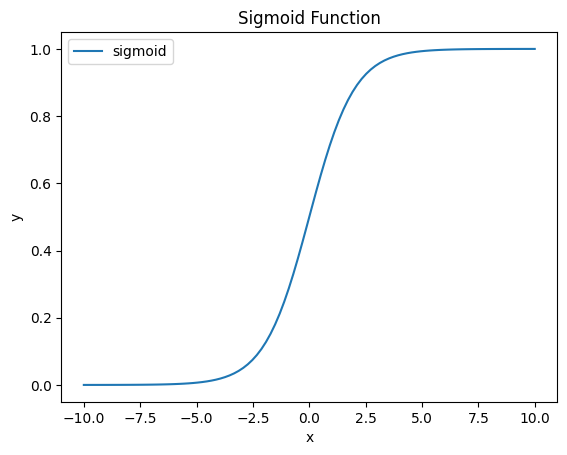

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, label="sigmoid")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Sigmoid Function")
ax.legend(loc="best")
plt.show()
plt.close(fig)

In [ ]:
import sympy as sp

x = sp.symbols("x")

f = 1 / (1 + sp.exp(-x))

f_prime = sp.diff(f, x)

# print(f_prime)
f_prime

exp(-x)/(1 + exp(-x))**2

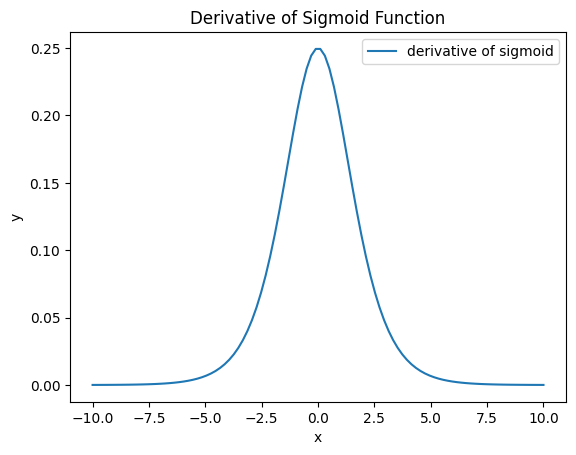

In [ ]:
t = np.linspace(-10, 10, 100)
derivative_func = sp.lambdify([x], f_prime, modules=['numpy'])
y = derivative_func(t)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, y, label="derivative of sigmoid")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Derivative of Sigmoid Function")
ax.legend(loc="best")
plt.show()
plt.close(fig)

### Hyperbolic tangent

Another activation function used instead of the sigmoid is the hyperbolic tangent ($tanh$). It is written as follows:

$$
f(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}
$$

The $tanh$ function squashes all the output values into the $(-1, 1)$ range. Its derivative is as follows:

$$
\frac{\mathrm{d}}{\mathrm{d}x}f=1-f(x)^{2}
$$

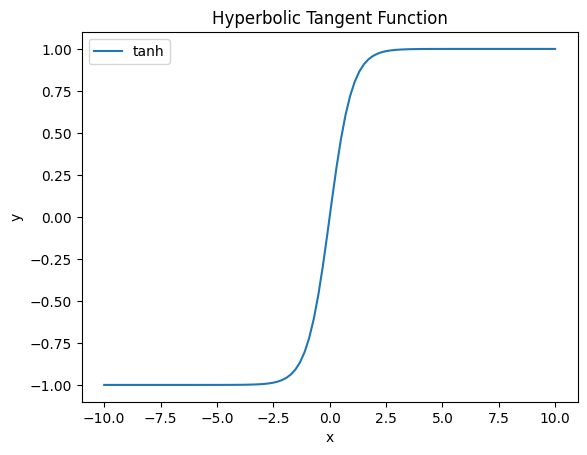

In [ ]:
x = np.linspace(-10, 10, 100)
y = np.tanh(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, label="tanh")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Hyperbolic Tangent Function")
ax.legend(loc="best")
plt.show()
plt.close(fig)

### Softmax

The softmax activation function normalizes a vector containing K elements into a probability distribution over the K elements. For this reason, it is generally used in the output layer to predict the probability of it being one of the classes.

The softmax function is as follows:

$$
f(x)=\frac{e^{x_{i}}}{\sum_{k=1}^{K}e^{x_{k}}}
$$

Its derivative can be found using the following:

$$
f^{\prime}(x)=\frac{e^{x_{i}}}{\sum_{k=1}^{K}e^{x_{k}}}-\frac{(e^{x_{i}})^{2}} {(\sum_{k=1}^{K}e^{x_{k}})^{2}}
$$

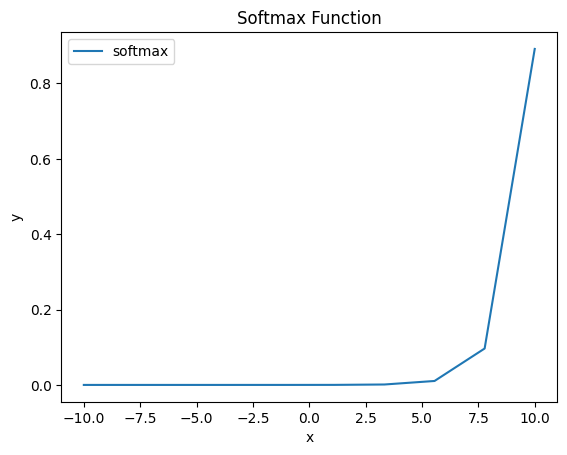

In [ ]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.linspace(-10, 10, 10)
y = softmax(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, label="softmax")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Softmax Function")
ax.legend(loc="best")
plt.show()
plt.close(fig)

### Rectified linear unit (ReLU)
ReLU is one of the most widely used activation functions because it is more computationally efficient than the activation functions we have already seen; therefore, it allows the network to train a lot faster and so converge more quickly.

The ReLU function is as follows:

$$
f(x)=\max(0,x)=\left\{\begin{array}{l}0\text{ if }x<0\\ x\text{ if }x\geq 0\end{array}\right.
$$

As you can see, all the negative values for $x$ are clipped off and turn into 0. It may surprise you to know that even though this looks like a linear function, it has a derivative that is as follows:

$$
\frac{\mathrm{d}}{\mathrm{d}x}f=\left\{\begin{array}{ll}1&\text{if}\ \ x\geq 0\\ 0&\text{otherwise}\end{array}\right.
$$

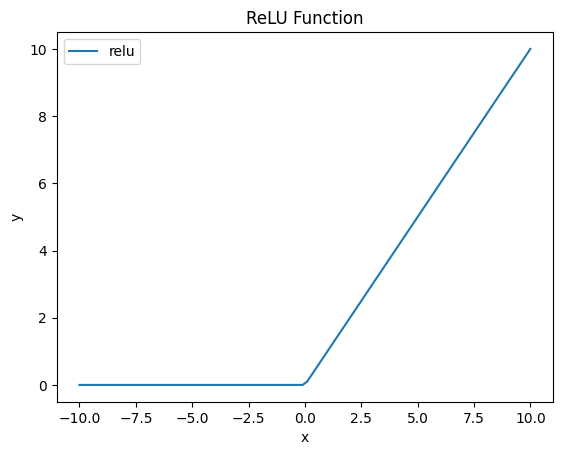

In [ ]:
x = np.linspace(-10, 10, 100)
y = np.maximum(0,x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, label="relu")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("ReLU Function")
ax.legend(loc="best")
plt.show()
plt.close(fig)

## The loss function

The loss function is a very critical part of neural networks and their training. They give us a means of calculating the error of a network after a forward pass has been computed. This error compares the neural network output with the target output that was specified in the training data.

There are two errors in particular that are of concern to us
* the local error
* and the global error.

The local error is the difference between the output expected of a neuron and its actual output.

The global error, however, is the total error (the sum of all the local errors) and it tells us how well our network is performing on the training data.

* Conventionally, the loss function is referred to as the cost function and is denoted as $J(\theta)$ (or, equivalently, $J(W,b)$).

### Mean absolute error

**Mean absolute error (MAE)** looks as follows:

$$
\text{MAE}=\frac{\sum_{i=1}^{N}\left|\hat{y}_{i}-y_{i}\right|}{N}
$$

Here, $N$ is the number of samples in our training dataset.

What we are doing here is calculating the absolute distance between the prediction and the true value and averaging over the sum of the errors.

### Mean squared error

**Mean squared error (MSE)** is one of the most commonly used loss functions, especially for regression tasks (it takes in a vector and outputs a scalar). It calculates the square of the difference between the output and the expected output. It looks as follows:

$$
\text{MSE}=\frac{1}{N}\sum_{i}\left\|\hat{y}_{i}-y_{i}\right\|_{2}^{2}
$$

Here, $N$ is the number of samples in our training dataset.

## Backpropagation

Now that we know how the forward passes are computed in MLPs and calculate the loss of the network, it is time for us to learn about backpropagation:
* a method that allows us to calculate the gradient of the network using the information from the loss function.

If you recall, this network is fully connected, which means all the nodes in each layer are connected to--and so have an impact on--the next layer.

It is for this reason that in backpropagation we take the derivative of the loss with respect to the weights of the layer closest to the output, then the one before that, and so on, until we reach the first layer.

For simplicity, let's say $z^{[l]}=W^{[l]}h^{[l-1]}+b^{[l]}$ and $h^{[l]}=\phi^{[l]}(z^{[l]})$ and assume that $b^{[l]}=0$.

Now, if we want to calculate the gradient of the loss with respect to $W^{[2]}$, we get the following:

$$
\frac{\partial J}{\partial W^{[2]}}=\frac{\partial J}{\partial\hat{y}}\frac{ \partial\hat{y}}{\partial z^{[4]}}\frac{\partial z^{[4]}}{\partial h^{[3]}} \frac{\partial h^{[3]}}{\partial z^{[3]}}\frac{\partial z^{[3]}}{\partial h^{[ 2]}}\frac{\partial h^{[2]}}{\partial z^{[2]}}\frac{\partial z^{[2]}}{\partial W ^{[2]}}
$$

Suppose we do want to find the partial of the loss with respect to $b^{[4]}$; this looks as follows:

$$
\frac{\partial J}{\partial b^{[4]}}=\frac{\partial J}{\partial\hat{y}}\frac{ \partial\hat{y}}{\partial z^{[4]}}\frac{\partial z^{[4]}}{\partial b^{[4]}}
$$

## Gradient descent Optimization

Gradient descent is a widely used first-order optimization problem, and it takes steps in the direction of the negative of the gradient of the function from the point it is currently at until it eventually terminates at the optimal solution.  

Imagine you're at a skateboarding park and you have a tennis ball in your hand. You bend down and place the ball on the surface of a ramp and let it go; gravity does its thing and the ball follows the ramp's curvature, finding its way to the bottom. This is the concept behind gradient descent.

In this case, the natural choice for the step is the negative gradient; that is, $\Delta x = - ∇f(x)$. This is known as gradient descent, which takes the following form:

$$
x_{k+1} = x_k -c_k ∇f(x_k)
$$

However, gradient descent isn't perfect:
* it can be quite slow if the step size, $c^{(k)}$, is too small,
* and if the step size is too large, we may not reach the optimal point due to overshooting, which would result in our algorithm failing to converge, thus diverging instead.

To understand this better, let's take a look at the following two diagrams. The first diagram has a small step size and looks as follows:

<p align="center">
<img src="https://drive.google.com/uc?id=1G4KMN1SL24mboogs963HCgliBpa3lt6c" width="400">
</p>

The second diagram shows a large step size:
<p align="center">
<img src="https://drive.google.com/uc?id=1jydd3wl-Wv2EK0FLDRip_uwrNibmhwqJ" width="400">
</p>


## Stochastic gradient descent

By now, you should be able to tell that computing the gradient and getting to the optima isn't easy and is time-consuming.

This is why computing an approximation that points us in the same general direction instead is useful.

We call this method **stochastic Gradient Descent (SGD)**, and it is a very important algorithm that theoretically guarantees convergence. The word **stochastic** comes from the fact that we do not know the precise value of the gradient, only an approximation of it.

Let's suppose we have $M$ points $(v_{1},v_{2},\cdots,v_{M})$, where $M$ is very large. This becomes a big optimization problem. So, we take an objective function, $L(x)$, which is a sum of the losses over the points. We write this as follows:

$$
L(x)=\sum_{m=1}^{M}L_{m}(x,v_{i})
$$

Here, our goal is to minimize the loss as much as possible so that our model best fits the true function, $y$, as in regression. By minimizing the loss, we reduce the distance between our model's calculated point and the true point.

Rewrite GD with this idea in the form of neural network parameters.

$$
\theta_{k+1} = \theta_k - c_k ∇J(\theta_k) = \theta_k - \frac{c_k}{M} \sum_{m=1}^{M} ∇J_m(\theta_k) = \theta_k - \hat{c}_k\sum_{m=1}^{M} ∇J_m(\theta_k)
$$
where $∇J_m(\theta_k)$ is the value of the loss function at $m$-th example.

The reason we use this method is that when we have a lot of points or a large optimization problem, it can be very computationally infeasible to calculate the gradient at each point, even more so if we were to calculate the Hessian. This method is, on the other hand, a lot more computationally feasible.

### Adaptive gradient descent

As we have seen, gradient descent takes some time to find its way to a relatively flat surface. An improvement to the preceding example is gradient descent with momentum, which smoothes the gradient updates so that it is less erratic. Consider a tennis ball and a boulder both rolling down a mountain. The tennis ball would bounce around more and likely get stuck, but the boulder would gain momentum as it goes and maintain a relatively straight path toward the bottom. That is the key idea behind this improvement. It does so by remembering the previous updates and each update is a combination of the previous and current gradients, as follows:

$$
x_{k+1}=x_{k}-c_{k}\nabla f(x_{k})+\alpha\triangle x_{k}
$$

Here, $\triangle x_{k}=x_{k}-x_{k+1}$ and $\alpha\in[0,1]$.

In this method, as you will notice, we not only have to choose the step size, $c_{i}$, but also the momentum coefficient, $\alpha$.

We briefly touched on adaptive step sizes earlier. These methods generally use the gradients from previous steps to guide the search direction and the step size to get us to convergence faster. The two main ones that we will look at are **adaptive gradient (Adagrad)** and **adaptive moment estimation (Adam)**.

As before, our goal is to find $x$, which minimizes the loss function.

These gradient descent methods take the form of $x_{k+1}=x_{k}-c_{k}G_{k}$, where $G_{k}$ is the gradient at the $k^{th}$ step.

In the case of Adagrad, we have $G_{k}=\nabla L(x_{k})$ and $c_{k}=c_{k}\left(\sum_{i=1}^{k}\left\|\nabla L_{i}(x)\right\|^{2}\right)^{ \frac{1}{2}}$, which, if we plug into the preceding equation, gives us the following:

$$
x_{k+1}=x_{k}+c_{k}\left(\sum_{i=1}^{k}\left\|\nabla L(x_{i})\right\|^{2} \right)^{\frac{1}{2}}\nabla L(x_{k})
$$

As you can see, we use the square root of the sum of the squares of the losses to update the step size at each step, which eliminates the need to do this ourselves.

Adam also keeps a history of the previous gradients, but it differs from Adagrad in that it stores an exponentially moving average of both the squared gradients and the gradients.

We write this as $G_{k}=\beta G_{k}+(1-\beta)\nabla L(x_{k})$ and $c_{k}=c_{k}\left((1-\gamma)\sum_{i=1}^{k}\gamma^{k-i}\left\|\nabla L_{i}(x) \right\|^{2}\right)^{\frac{1}{2}}$.

## Training neural networks

We learned about gradient descent and how we iteratively move from one point on the function to a lower point on the function that is in the direction of the local/global minima by taking a step in the direction of the negative of the gradient. We expressed it in the following form:

$$
\mathbf{x}_{k+1}=\mathbf{x}_{k}-c_{k}\nabla f(\mathbf{x})
$$

However, for neural networks, the update rule for the weights, in this case, is written as follows:

$$
\theta^{[l+1]}=\theta^{[l]}-\alpha\frac{\partial J}{\partial\theta^{[l]}}
$$

Here, $\theta= (W,b)$.

#### Parameter Initialization

This is an extremely important part of training neural networks because as mentioned earlier on in this chapter, neural networks have a lot of parameters--often, well over tens of millions--which means that finding the point in the weight space that minimizes our loss can be very time consuming and challenging (because the weight space is non-convex; that is, there are lots of local minima and saddle points).

For this reason, finding a good initial point is important because it makes it easier to get to the optima and reduce the training time, as well as reducing the chances of our weights either vanishing or exploding. Let's now explore the various ways that we can initialize our weights and biases.

* Zero Initialization (not recommended)
* Random Initalization (works)
* Xavier initialization (for most of the tasks best so far)  
It is as follows:
$$
W_{i,j}^{[k]}\sim U\left[-\frac{\sqrt{6}}{n_{k}+n_{k-1}},\frac{\sqrt{6}}{n_{k }+n_{k-1}}\right]
$$
Here, $n_{k}$ is the number of neurons in layer $k$.

The idea is that we want to maintain the variance as we propagate through subsequent layers.  

# Function Approximation With Deep Neural Networks

Suppose we want to approximate a function $f(x)$ by using deep neural networks.

To do this, we can generate a dataset of input-output pairs $(x_i, f(x_i))$ and train a neural network to predict the output given the input.

### Libraries

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

torch.set_default_dtype(torch.float)
torch.manual_seed(1234)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

cpu


### Function

In [ ]:
def f(x):
    y = torch.sin(x)
    return y

### Neural Network

In [ ]:
class FCN(torch.nn.Module):
    def __init__(self, layers):
        super().__init__()

        self.layers = layers

        self.activation = torch.nn.Tanh()
        self.loss_function = torch.nn.MSELoss(reduction='mean')

        self.linears = torch.nn.ModuleList(
            [
                torch.nn.Linear(self.layers[i], self.layers[i + 1])
                for i in range(len(self.layers) - 1)
            ]
        )
        for linear in self.linears:
            torch.nn.init.xavier_normal_(linear.weight.data)
            torch.nn.init.zeros_(linear.bias.data)

    def forward(self, x):
        if not torch.is_tensor(x):
            x = torch.from_numpy(x)
        h = x.float()
        for layer in self.linears[:-1]:
            z = layer(h)
            h = self.activation(z)
        y = self.linears[-1](h)
        return y

    def loss(self, x, y):
        loss_val = self.loss_function(self.forward(x), y)
        return loss_val

### Generate Data

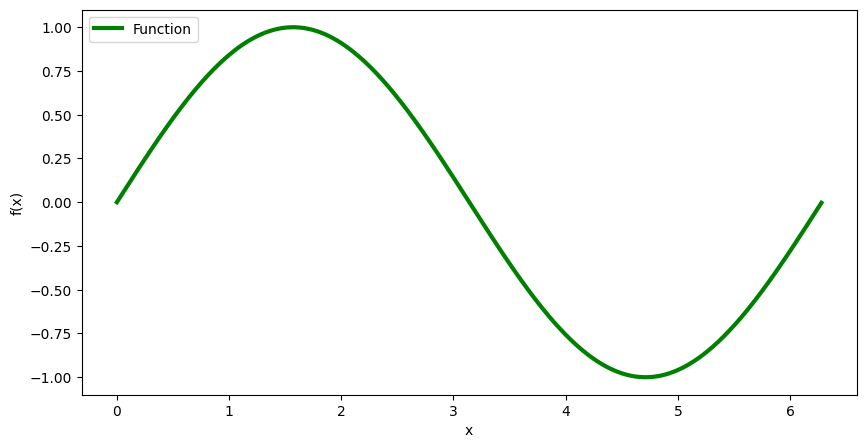

In [ ]:
num_points = 500

x = torch.linspace(0, 2 * 3.14, num_points).view(-1, 1)  # prepare to NN
y = f(x)


fig, ax1 = plt.subplots(figsize=(10, 5))
line_width = 3
ax1.plot(x, y, linewidth=line_width, color="green", label="Function")
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
ax1.tick_params(axis="y")
ax1.legend(loc="upper left")
plt.show()
plt.close(fig)

### Prepare Train and Test Data

In [ ]:
indices = np.arange(num_points)
train_idx, test_idx, _, _ = train_test_split(
    indices, indices, test_size=0.2, random_state=42
)

x_train = x[train_idx]
y_train = y[train_idx]

x_test = x[test_idx]
y_test = y[test_idx]


### Call Model and Optimizer

In [ ]:
steps = 5_000
lr = 1e-3

x_train = x_train.float().to(device)
y_train = y_train.float().to(device)

x_test = x_test.float().to(device)
y_test = y_test.float().to(device)

layers = np.array([1, 50, 50, 1])

model = FCN(layers).to(device)
model.to(device)

FCN(
  (activation): Tanh()
  (loss_function): MSELoss()
  (linears): ModuleList(
    (0): Linear(in_features=1, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=50, bias=True)
    (2): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr, amsgrad=True)

### Train Loop

In [ ]:
loss_values = []
loss_test_values = []

for i in range(steps + 1):

    optimizer.zero_grad()
    loss = model.loss(x_train, y_train)
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
        loss_test = model.loss(x_test, y_test)

    loss_values.append(loss.item())
    loss_test_values.append(loss_test.item())

    if i % int(steps * 0.1) == 0:
        print(
            f"It: {i:5d} | Loss: {loss_values[-1]:.3e} | "
            f"Test Loss: {loss_test_values[-1]:.3e}"
        )

It:     0 | Loss: 8.216e-01 | Test Loss: 5.625e-01
It:   500 | Loss: 1.767e-02 | Test Loss: 2.775e-02
It:  1000 | Loss: 7.874e-04 | Test Loss: 1.325e-03
It:  1500 | Loss: 2.124e-04 | Test Loss: 3.277e-04
It:  2000 | Loss: 1.329e-04 | Test Loss: 1.913e-04
It:  2500 | Loss: 9.539e-05 | Test Loss: 1.346e-04
It:  3000 | Loss: 7.129e-05 | Test Loss: 9.998e-05
It:  3500 | Loss: 5.480e-05 | Test Loss: 7.666e-05
It:  4000 | Loss: 4.308e-05 | Test Loss: 6.016e-05
It:  4500 | Loss: 3.447e-05 | Test Loss: 4.808e-05
It:  5000 | Loss: 2.800e-05 | Test Loss: 3.899e-05


### Prediction

In [ ]:
with torch.inference_mode():
  y_pred = model(x_test)

In [ ]:
_, indices2 = torch.sort(x_test.squeeze(1))

x_test_plot = x_test[indices2]
y_test_plot = y_test[indices2]
y_pred_plot = y_pred[indices2]

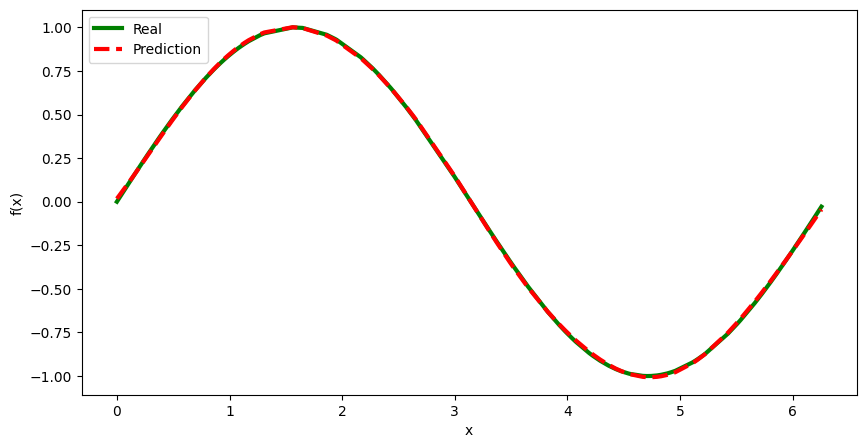

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))
line_width = 3
ax1.plot(x_test_plot, y_test_plot, linewidth=line_width, color="green", label="Real")
ax1.plot(x_test_plot, y_pred_plot, "--", linewidth=line_width, color="red", label="Prediction")
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
ax1.tick_params(axis="y")
ax1.legend(loc="upper left")
plt.show()
plt.close(fig)

### Loss Plots

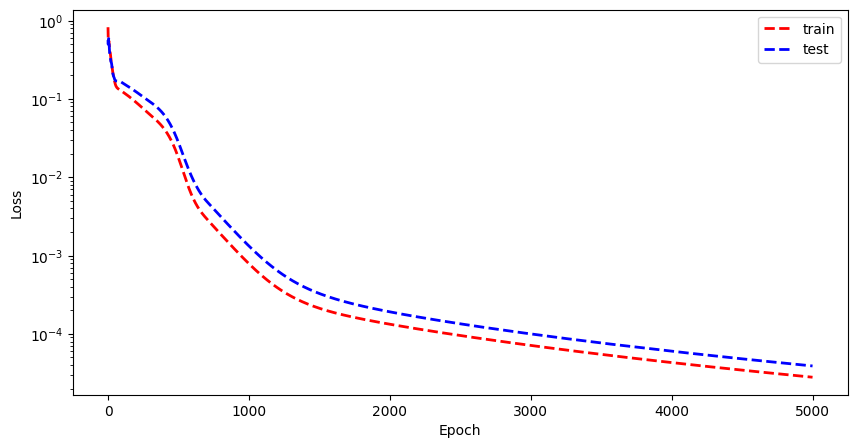

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))
line_width = 2
ax1.plot(loss_values, "r--", linewidth=line_width, label="train")
ax1.plot(loss_test_values, "b--", linewidth=line_width, label="test")
ax1.set_yscale("log")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(loc=0)
plt.show()
plt.close(fig)